In [3]:
from sympy import *
from sympy.matrices import *
init_printing()

## ¿Cómo definir matrices?

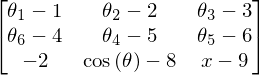

In [22]:
x = symbols("x")
t1,t2,t3,t4,t5,t6 = symbols("\\theta_1:7")
a,b,c,d,e,f = symbols("a:f")

A = Matrix([[t1,t2,t3], [t6,t4,t5], [5,cos(th),x]])
B = Matrix([[1,2,3],[4,5,6],[7,8,9]])
A-B

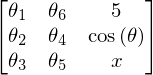

In [25]:
A.T

## Definiendo funciones para realizar transformaciones

In [34]:
def rotz(theta):
    H = Matrix([[cos(theta), -sin(theta), 0, 0], 
                [sin(theta), cos(theta), 0, 0], 
                [0,0,1,0],
                [0,0,0,1]])
    return H

def roty(theta):
    H = Matrix([[cos(theta), 0, sin(theta), 0], 
                [0,1,0,0],
                [-sin(theta), 0, cos(theta), 0], 
                [0,0,0,1]])
    return H

def rotx(theta):
    H = Matrix([[1,0,0,0],
                [0, cos(theta), -sin(theta), 0], 
                [0, sin(theta), cos(theta), 0], 
                [0,0,0,1]])
    return H

def Dx(d):
    H = Matrix([[1, 0, 0, d], 
               [0, 1, 0, 0], 
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
    return H

def Dy(d):
    H = Matrix([[1, 0, 0, 0], 
               [0, 1, 0, d], 
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
    return H

def Dz(d):
    H = Matrix([[1, 0, 0, 0], 
               [0, 1, 0, 0], 
               [0, 0, 1, d],
               [0, 0, 0, 1]])
    return H

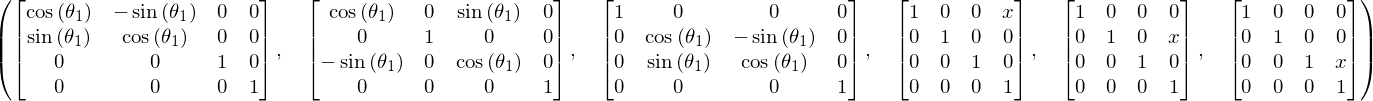

In [36]:
rotz(t1), roty(t1), rotx(t1), Dx(x), Dy(x), Dz(x)

In [37]:
y,z = symbols("y,z")

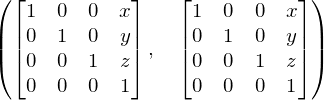

In [39]:
Dx(x)*Dz(z)*Dy(y), Dz(z)*Dy(y)*Dx(x)

1. El sistema de referencia \{B\} está trasladado 5 unidades en $X$, 4 unidades en $Y$ y -10 unidades en $Z$ con respecto 
al sistema \{A\}. Se sabe que las coordenadas de un punto $P$ descritas en el sistema \{B\} son $\vec{P}^B = [2,3,-5]^T$, 
calcule $\vec{P}^A$.

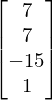

In [42]:
TBA = Dx(5)*Dy(4)*Dz(-10)
PB = Matrix([2,3,-5,1])
PA = TBA*PB
PA

2. Muestre que la distancia entre dos puntos no cambia con la rotación, es decir, que 
$\lVert \vec{p_1} - \vec{p_2} \rVert = \lVert R\vec{p_1} - R\vec{p_2}  \rVert$. Donde 
$R$ es una matriz de rotación y $\vec{p}_1$ y $ \vec{p}_2 $ dos vectores de posición.

In [64]:
t1,t2 = symbols("\\theta_1,\\theta_2", positive=True)
R = roty(t1)*rotx(t2)
p1 = Matrix([1,2,1,1])
p2 = Matrix([5,4,3,1])

Matrix( (p1 - p2)[:-1] ).norm().evalf()

In [65]:
simplify( Matrix( ( R*p1 - R*p2 )[:-1] ).norm() ).evalf()

Suponga que tres sistemas de referencia \{A\}, \{B\} y \{C\} están dados y que además:

$$
R_B^A = \left[\begin{matrix}\frac{1}{2} & - \frac{\sqrt{3}}{2} & 0\\0 & 0 & -1\\\frac{\sqrt{3}}{2} & \frac{1}{2} & 0\end{matrix}\right]
\quad R_C^A = \left[\begin{matrix}0 & 1 & 0\\0 & 0 & -1\\-1 & 0 & 0\end{matrix}\right]
$$

Calcule $R_B^C$.

$ R_B^C = R_A^C R_B^A $

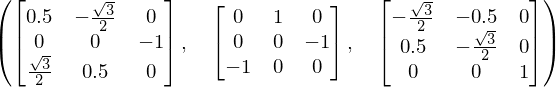

In [68]:
RBA = Matrix([[1/2, -sqrt(3)/2, 0], [0,0,-1], [sqrt(3)/2, 1/2, 0]])
RCA = Matrix([[0,1,0], [0,0,-1],[-1,0,0]])
RCB = RCA.inv() * RBA
RBA, RCA, RCB

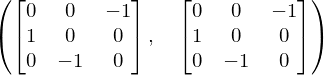

In [70]:
RCA.inv(), RCA.T

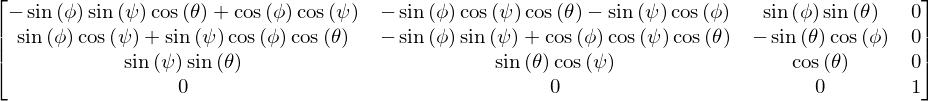

In [71]:
phi, theta, psi = symbols("\\phi, \\theta, \\psi")

rotz(phi)*rotx(theta)*rotz(psi)